In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
from data import *

In [3]:
%pwd

'/Users/yg/code/github/DS-GA-1013/hw/hw8/code/timedata'

In [4]:
x = np.array([1,2,1,0,1,2,1,0])
w = np.fft.fft(x)

freqs = np.fft.fftfreq(len(x))
print(w)
for coef,freq in zip(w,freqs):
    if coef:
        print('{c:>6} * exp(2 pi i t * {f})'.format(c=coef,f=freq))


[8.+0.j 0.+0.j 0.-4.j 0.+0.j 0.+0.j 0.+0.j 0.+4.j 0.+0.j]
(8+0j) * exp(2 pi i t * 0.0)
   -4j * exp(2 pi i t * 0.25)
    4j * exp(2 pi i t * -0.25)


In [5]:
x = np.array([-10, 2, 1, 0, 1, 2, 1, 0, 2, 1])
N = x.shape[0]
w = np.fft.fft(x)
w_abs = np.abs(w)
freqs = np.fft.fftfreq(len(x), 1./N)
print(w_abs)
print(freqs)
for coef,freq in zip(w_abs,freqs):
    if coef:
        print('{c} * exp(2 pi i t * {f})'.format(c=coef, f=freq))

[ 0.         10.27035864  8.88939178 14.81619835 11.22402396 10.
 11.22402396 14.81619835  8.88939178 10.27035864]
[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]
10.270358639003575 * exp(2 pi i t * 1.0)
8.889391781007976 * exp(2 pi i t * 2.0)
14.816198345940318 * exp(2 pi i t * 3.0)
11.22402395595037 * exp(2 pi i t * 4.0)
10.0 * exp(2 pi i t * -5.0)
11.22402395595037 * exp(2 pi i t * -4.0)
14.816198345940318 * exp(2 pi i t * -3.0)
8.889391781007976 * exp(2 pi i t * -2.0)
10.270358639003575 * exp(2 pi i t * -1.0)


In [6]:
indices = np.argsort(w_abs)[::-1][:3]
print(indices)
for i in indices:
    print(w_abs[i], freqs[i])

[7 3 6]
14.816198345940318 -3.0
14.816198345940318 3.0
11.22402395595037 -4.0


In [7]:
def get_N_top_frequencies(x, top_n):
    N = x.shape[0]
    w = np.fft.fft(x)
    w_abs = np.abs(w)
    freqs = np.fft.fftfreq(len(x), 1./N)
    indices = np.argsort(w_abs)[::-1][:top_n]
    top_w_abs = [w_abs[i] for i in indices]
    top_freqs = [freqs[i] for i in indices]
    return top_w_abs, top_freqs

In [8]:
top_w_abs, top_freqs = get_N_top_frequencies(x, 3)

In [9]:
print(top_w_abs, top_freqs)

[14.816198345940318, 14.816198345940318, 11.22402395595037] [-3.0, 3.0, -4.0]


In [10]:
s,m,l = load_data()

In [11]:
# w_abs  = np.abs(w)
# uniques, uniq_idx, counts = np.unique(w_abs,return_index=True,return_counts=True)
# duplicates = w_abs[ uniq_idx[counts>=2] ]
#duplicates

In [39]:
np.arange(1,10,1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
def get_coefficients_freqs(signal: np.array, scaled=False):
    N = signal.shape[0]
    if scaled:
        w = np.fft.fft(signal) * 1/N
    else:
        w = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(w), 1/N)   
    return w, np.abs(w), freqs

In [128]:
def plot_signals():
    
    s,m,l = load_data()
    
    figure = plt.figure(figsize=(12, 12))

    plot_a = plt.subplot(311)
    
    w_a, abs_w_a, freqs_a = get_coefficients_freqs(s)
    plot_a.plot(freqs_a, abs_w_a)
    plot_a.set_xlabel("Frequency", fontsize=15, labelpad=10)
    plot_a.set_ylabel("Magnitude", fontsize=15, labelpad=10)
    plt.setp(plot_a.get_xticklabels(), fontsize=18)
    plt.setp(plot_a.get_yticklabels(), fontsize=18)
    N_a = s.shape[0]
    plot_a.set_xlim(-N_a / 2 - 10, N_a / 2 + 10)
    #plot_a.set_xticks(np.arange(-1000, 1100, 500))
    plot_a.set_title("First sampling N=" + str(N_a), fontsize=18, horizontalalignment="center")

    plot_b = plt.subplot(312)
    w_b, abs_w_b, freqs_b = get_coefficients_freqs(m)
    plot_b.plot(freqs_b, abs_w_b)
    plot_b.set_xlabel("Frequency", fontsize=15, labelpad=10)
    plot_b.set_ylabel("Magnitude", fontsize=15, labelpad=10)
    plt.setp(plot_b.get_xticklabels(), fontsize=18)
    plt.setp(plot_b.get_yticklabels(), fontsize=18)
    N_b = m.shape[0]
    plot_b.set_xlim(-N_b / 2 - 10, N_b / 2 + 10)
    plot_b.set_title("Second sampling N=" + str(N_b), fontsize=18, horizontalalignment="center")

    plot_c = plt.subplot(313)
    w_c, abs_w_c, freqs_c = get_coefficients_freqs(l)
    plot_c.plot(freqs_c, abs_w_c)
    plot_c.set_xlabel("Frequency", fontsize=15, labelpad=10)
    plot_c.set_ylabel("Magnitude", fontsize=15, labelpad=10)
    plt.setp(plot_c.get_xticklabels(), fontsize=18)
    plt.setp(plot_c.get_yticklabels(), fontsize=18)
    N_c = l.shape[0]
    plot_c.set_xlim(-N_c / 2 - 10, N_c / 2 + 10)
    plot_c.set_title("Third sampling N=" + str(N_c), fontsize=18, horizontalalignment="center")

    plt.gcf().subplots_adjust(bottom=0.3)
    plt.gcf().subplots_adjust(left=0.3)
    figure.tight_layout(pad=3.0)

    plt.savefig("question_1.pdf")
    plt.show()

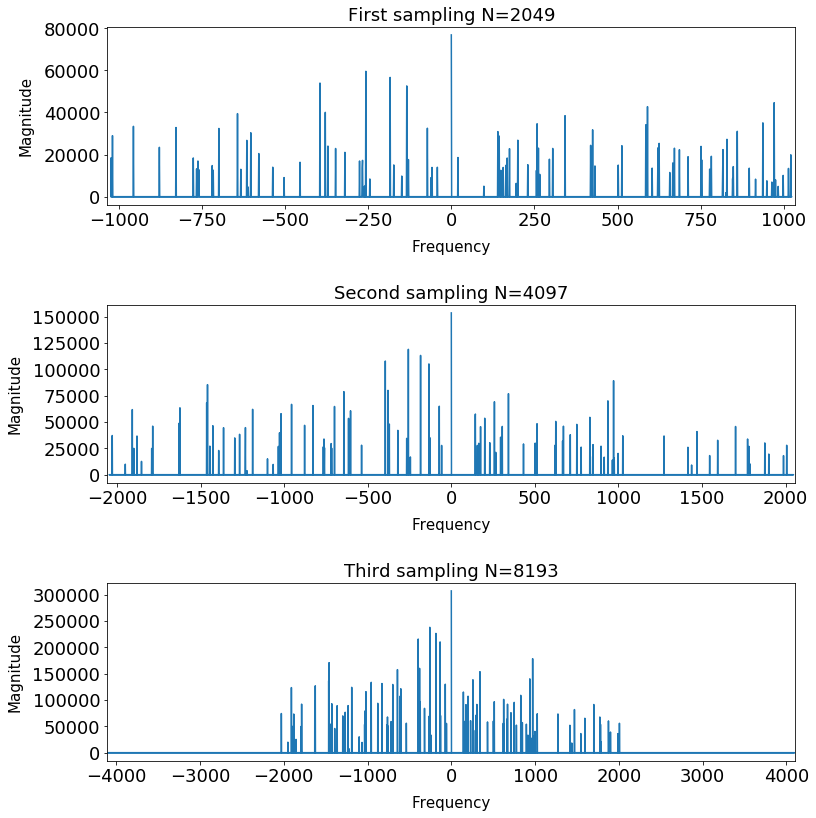

In [129]:
plot_signals()

In [130]:
def plot_signals_2():
    
    s,m,l = load_data()
    
    figure = plt.figure(figsize=(12, 12))

    plot_a = plt.subplot(311)
    
    w_a, abs_w_a, freqs_a = get_coefficients_freqs(s, scaled=True)
    plot_a.plot(freqs_a, abs_w_a)
    plot_a.set_xlabel("Frequency", fontsize=15, labelpad=10)
    plot_a.set_ylabel("Magnitude", fontsize=15, labelpad=10)
    plot_a.set_xticks(np.arange(-1000, 1000, 200))
    plot_a.set_yticks(np.arange(0, 40, 5.0))
    #plt.setp(plot_a.get_xticklabels(), fontsize=18)
    #plt.setp(plot_a.get_yticklabels(), fontsize=18)
    #plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    N_a = s.shape[0]
    plot_a.set_xlim(-1000, 1000)
    plot_a.set_ylim(0, 40)
    #plot_a.set_xlim(-N_a / 2 - 10, N_a / 2 + 10)
    plot_a.set_title("First sampling N=" + str(N_a), fontsize=18, horizontalalignment="center")

    plot_b = plt.subplot(312)
    w_b, abs_w_b, freqs_b = get_coefficients_freqs(m, scaled=True)
    plot_b.plot(freqs_b, abs_w_b)
    plot_b.set_xlabel("Frequency", fontsize=15, labelpad=10)
    plot_b.set_ylabel("Magnitude", fontsize=15, labelpad=10)
    plot_b.set_xticks(np.arange(-1000, 1000, 200))
    plot_b.set_yticks(np.arange(0, 40, 5.0))
    N_b = m.shape[0]
    plot_b.set_xlim(-1000, 1000)
    plot_b.set_ylim(0, 40)
    #plot_b.set_xlim(-N_b / 2 - 10, N_b / 2 + 10)
    plot_b.set_title("Second sampling N=" + str(N_b), fontsize=18, horizontalalignment="center")

    plot_c = plt.subplot(313)
    w_c, abs_w_c, freqs_c = get_coefficients_freqs(l, scaled=True)
    plot_c.plot(freqs_c, abs_w_c)
    plot_c.set_xticks(np.arange(-1000, 1000, 200))
    plot_c.set_yticks(np.arange(0, 40, 5.0))
    plot_c.set_xlabel("Frequency", fontsize=15, labelpad=10)
    plot_c.set_ylabel("Magnitude", fontsize=15, labelpad=10)
    N_c = l.shape[0]
    plot_c.set_xlim(-1000, 1000)
    plot_b.set_ylim(0, 40)
    plot_c.set_title("Third sampling N=" + str(N_c), fontsize=18, horizontalalignment="center")

    plt.gcf().subplots_adjust(bottom=0.3)
    plt.gcf().subplots_adjust(left=0.3)
    figure.tight_layout(pad=3.0)

    plt.savefig("question_1_1.pdf")
    plt.show()

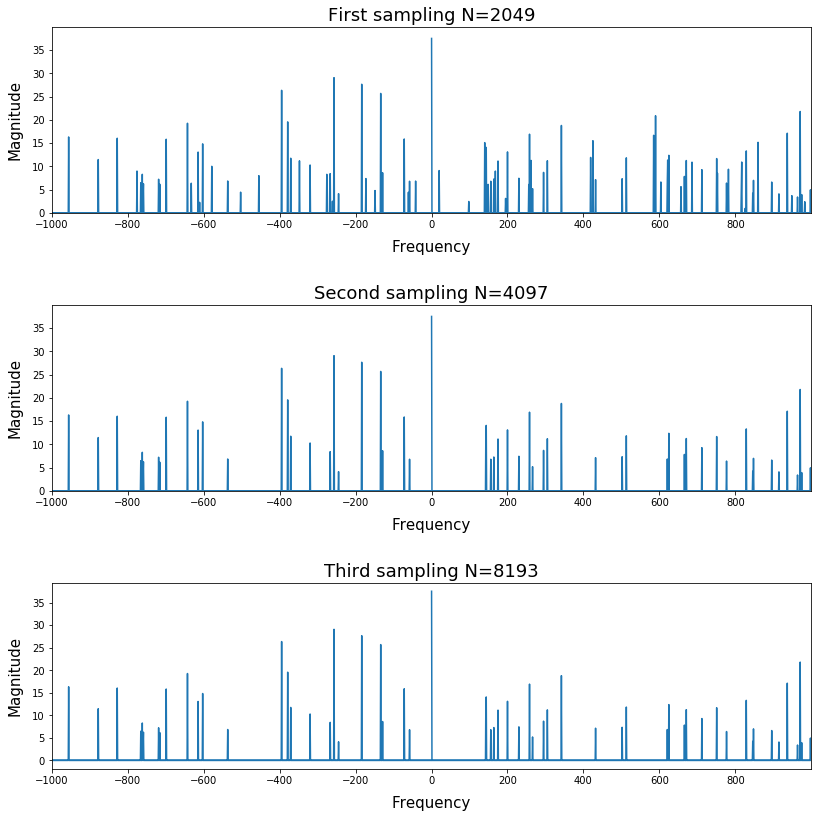

In [131]:
plot_signals_2()

In [77]:
top_s_w_abs, top_s_freqs = get_N_top_frequencies(s, 3)

In [16]:
print(top_s_w_abs, top_s_freqs)

[76837.50000000006, 59544.473762391885, 56645.96948199106] [0.0, -257.0, -184.0]


In [18]:
top_m_w_abs, top_m_freqs = get_N_top_frequencies(m, 3)
print(top_m_w_abs, top_m_freqs)

[153637.49999999994, 119059.88726428473, 113264.29329805628] [0.0, -257.0, -184.0]


In [19]:
top__w_abs, top_l_freqs = get_N_top_frequencies(l, 3)
print(top_l_w_abs, top_l_freqs)

[307237.50000000035, 238090.71426807056, 226500.94093018683] [0.0, -257.0, -184.0]


In [132]:
76837 * 2

153674